In [155]:
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotly.express as px
import pandas as pd
import json

In [201]:
df = pd.read_excel('Turnout.xlsx')
df #check ok
df = df.drop('Change', axis = 1)
df = df.drop('%Change', axis = 1)

In [224]:
df2 = df.melt(id_vars = 'State / Union Territory', var_name='Year', value_name='% Turnout',)
min_turnout = df2['% Turnout'].min()
max_turnout = df2['% Turnout'].max()
df2

,State / Union Territory,Year,% Turnout
0,Andaman & Nicobar Islands,1999,59.46
1,Andhra Pradesh,1999,69.14
2,Arunachal Pradesh,1999,72.15
3,Assam,1999,71.26
4,Bihar,1999,61.48
...,...,...,...
63,Telangana,2024,65.67
64,Tripura,2024,80.93
65,Uttar Pradesh,2024,56.92
66,Uttarakhand,2024,57.22


In [207]:
india_states = json.load(open("states_india.geojson", 'r'))

In [236]:
fig=px.choropleth(
             df2,
             geojson= "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
             featureidkey='properties.ST_NM',   
             locations='State / Union Territory',        #column in dataframe
             color= '% Turnout',  #dataframe
             animation_frame= 'Year',
             color_continuous_scale='darkmint',
             title='Statewise Voter Turnout in 1999 vs 2024 Lok Sabha Elections (Source: ECI)' ,  
             height=700,
             range_color=[min_turnout, max_turnout]
)
fig.update_geos(fitbounds="locations", visible=False)
plot(fig)

C:\Users\tanus\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



'temp-plot.html'

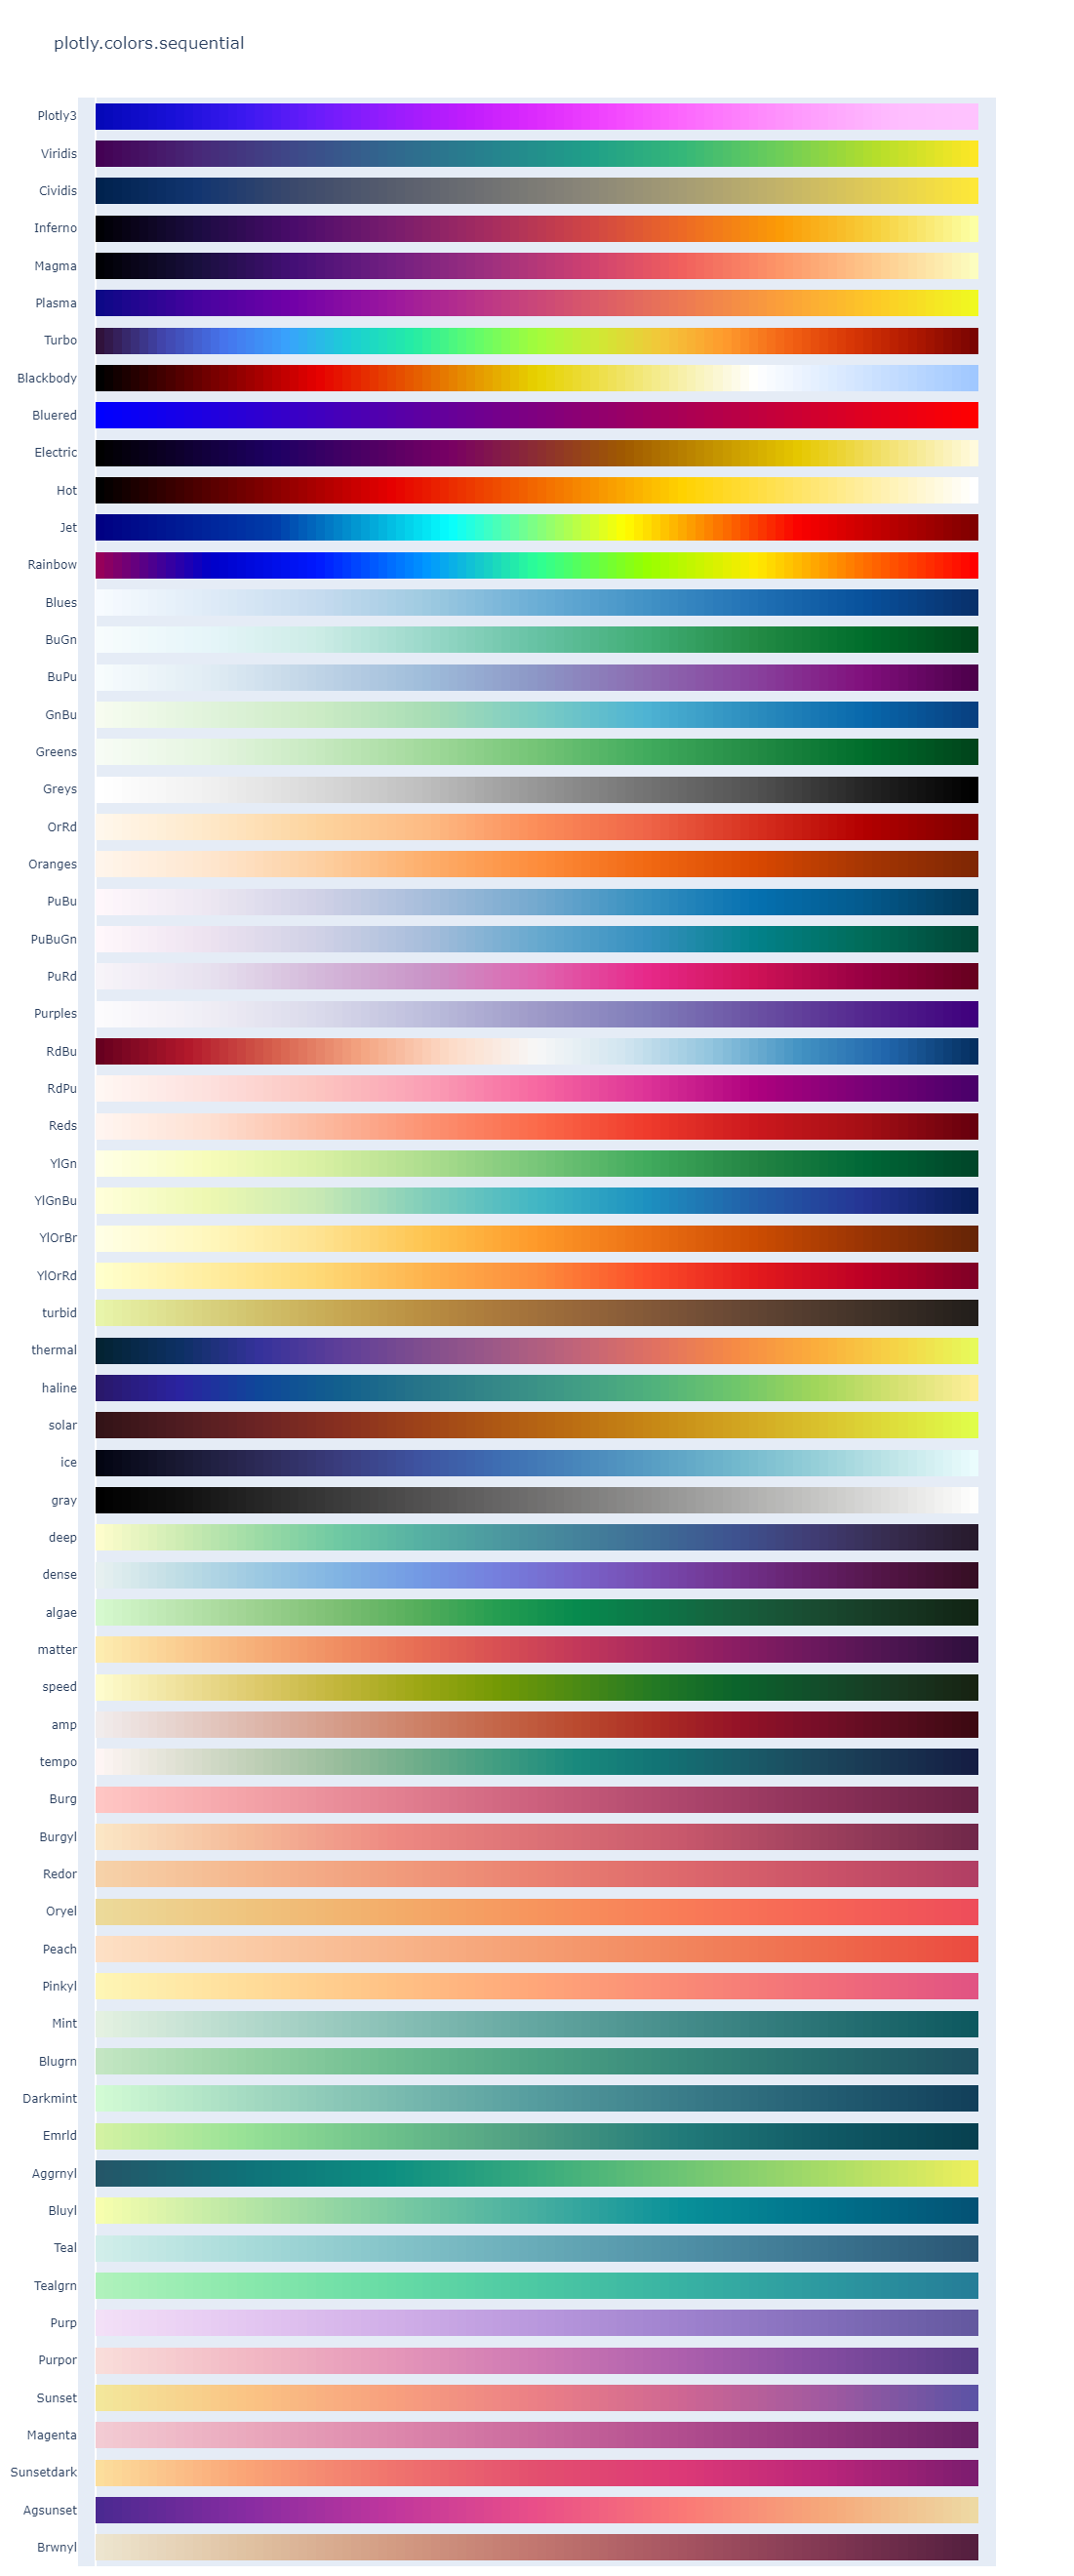

In [43]:
fig = px.colors.sequential.swatches_continuous() 
fig.show() 